# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Call units
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#url
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

558

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# set lists for the dataframe
city_found = []
dates = []
wind_speeds = []
countries = []
cloudinesses = []
humidity = []
lats = []
lngs = []
max_temps = []
temp =[]
temp_min = []

# create count format for organization
count_one = 0
set_one = 1

for city in cities:
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        dates.append(response['dt'])
        countries.append(response['sys']['country'])
        wind_speeds.append(response['wind']['speed'])
        cloudinesses.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        temp.append(response['main']['temp'])
        temp_min.append(response['main']['temp_min'])
        if count_one > 50:
            count_one = 1
            set_one += 1
            city_found.append(city)
        else:
            count_one += 1
            city_found.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | baghdad
Processing Record 2 of Set 1 | raudeberg
Processing Record 3 of Set 1 | ketchikan
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | armidale
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | flin flon
Processing Record 10 of Set 1 | muskegon
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | mys shmidta
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | busselton
City not found. Skipping...
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 | grand river south east
Processing Rec

City not found. Skipping...
Processing Record 29 of Set 4 | high level
City not found. Skipping...
Processing Record 30 of Set 4 | nadym
Processing Record 31 of Set 4 | abu zabad
Processing Record 32 of Set 4 | jaru
City not found. Skipping...
Processing Record 33 of Set 4 | taoudenni
Processing Record 34 of Set 4 | kushima
Processing Record 35 of Set 4 | san patricio
Processing Record 36 of Set 4 | calvinia
Processing Record 37 of Set 4 | sumenep
Processing Record 38 of Set 4 | srednekolymsk
Processing Record 39 of Set 4 | port macquarie
Processing Record 40 of Set 4 | honavar
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | simpang
Processing Record 43 of Set 4 | salinopolis
Processing Record 44 of Set 4 | tuktoyaktuk
Processing Record 45 of Set 4 | waingapu
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | dubti
Processing Record 48 of Set 4 | pierre
Processing Record 49 of Set 4 | itarema
Processing Record 50 of Set 4 | tshela
Proc

Processing Record 9 of Set 8 | phalaborwa
Processing Record 10 of Set 8 | ponta delgada
Processing Record 11 of Set 8 | pokhara
Processing Record 12 of Set 8 | longjiang
Processing Record 13 of Set 8 | sorong
Processing Record 14 of Set 8 | saint-louis
Processing Record 15 of Set 8 | san quintin
Processing Record 16 of Set 8 | lovozero
City not found. Skipping...
Processing Record 17 of Set 8 | vardo
Processing Record 18 of Set 8 | insar
Processing Record 19 of Set 8 | tessalit
Processing Record 20 of Set 8 | ranong
Processing Record 21 of Set 8 | tigzirt
Processing Record 22 of Set 8 | ballina
Processing Record 23 of Set 8 | nizhniy ufaley
Processing Record 24 of Set 8 | kurilsk
City not found. Skipping...
Processing Record 25 of Set 8 | tabou
City not found. Skipping...
Processing Record 26 of Set 8 | ancud
Processing Record 27 of Set 8 | tirlyanskiy
Processing Record 28 of Set 8 | yeppoon
Processing Record 29 of Set 8 | santa fe
Processing Record 30 of Set 8 | matay
City not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a dictionary for establishing dataframe
temps_dictionary = {
    "City":city_found,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Wind Speed":wind_speeds,
    "Max Temp":max_temps,
    "Temperature":temp,
    "Min Temp":temp_min}
    
# establish dataframe
temps_dataframe = pd.DataFrame(temps_dictionary)
    
# show the top of the dataframe
temps_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Wind Speed,Max Temp,Temperature,Min Temp
0,baghdad,0,IQ,1563759109,44,33.30,44.38,6.93,80.6,80.60,80.6
1,raudeberg,100,NO,1563759109,87,61.99,5.14,11.41,55.4,54.64,54.0
2,ketchikan,20,US,1563759109,52,55.34,-131.65,13.87,68.0,66.78,66.2
3,vaini,75,IN,1563759000,94,15.34,74.49,6.93,71.6,70.68,69.8
4,armidale,95,AU,1563759110,42,-30.51,151.67,4.00,55.0,55.00,55.0


In [10]:
# output data to csv
temps_dataframe.to_csv("Temperature_Output.csv")

In [11]:
temps_dataframe.count()

City           487
Cloudiness     487
Country        487
Date           487
Humidity       487
Lat            487
Lng            487
Wind Speed     487
Max Temp       487
Temperature    487
Min Temp       487
dtype: int64

In [12]:
temps_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Wind Speed,Max Temp,Temperature,Min Temp
0,baghdad,0,IQ,1563759109,44,33.30,44.38,6.93,80.6,80.60,80.6
1,raudeberg,100,NO,1563759109,87,61.99,5.14,11.41,55.4,54.64,54.0
2,ketchikan,20,US,1563759109,52,55.34,-131.65,13.87,68.0,66.78,66.2
3,vaini,75,IN,1563759000,94,15.34,74.49,6.93,71.6,70.68,69.8
4,armidale,95,AU,1563759110,42,-30.51,151.67,4.00,55.0,55.00,55.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

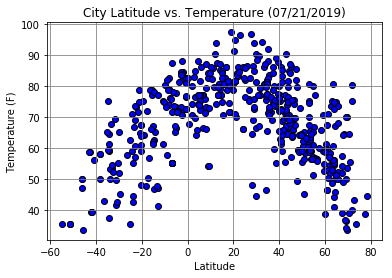

In [13]:
plt.scatter(temps_dataframe["Lat"],temps_dataframe["Temperature"],facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Temperature (07/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.show()

In [14]:
plt.savefig("LatituteTempfig1.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

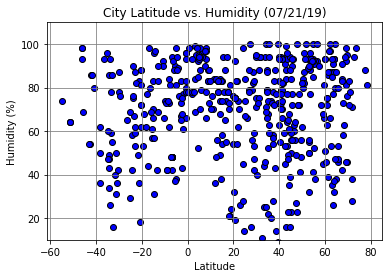

In [15]:
plt.scatter(temps_dataframe["Lat"],temps_dataframe["Humidity"],facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Humidity (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(10,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.show()

In [16]:
plt.savefig("LatituteHumidfig2.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

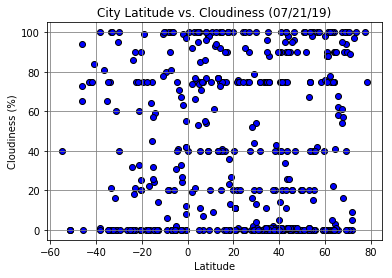

In [17]:
plt.scatter(temps_dataframe["Lat"],temps_dataframe["Cloudiness"],facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.show()

In [18]:
plt.savefig("LatituteCloudFig3.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

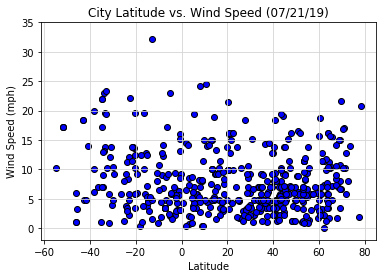

In [19]:
plt.scatter(temps_dataframe["Lat"],temps_dataframe["Wind Speed"],facecolors="blue",edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,35)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

In [20]:
plt.savefig("LatitudeWindfig4.png")

<Figure size 432x288 with 0 Axes>